## Part-I: GDP Analysis of Indian States
### Part I-A

In [33]:
# Importing modules and reading Data I-A file 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\vamshipeddapalli\Desktop\Data_science_IIIT\Main_course\Modules\Statistics_EDA\GDP-Analysis-assignments\Data_1-A\Data I-A.csv")

In [34]:
# as we dont require it removing 2016-17 data
df=df[~df['Duration'].isin(['2016-17'])]
#print(df)

In [35]:
# Average growth of the each states - calculating mean here for each column of year 2013-14, 2014-15 and 2015-16
# Removing west Bengal and All_india GDP as we dont have any value for west bengal(NAN) and here we are calculating only for states so removing All_india_GDP
Mean_value_each_state=df.loc[[7,8,9]].mean(axis=0).drop(['West Bengal1','All_India GDP'])
#Mean_value_each_state.head()

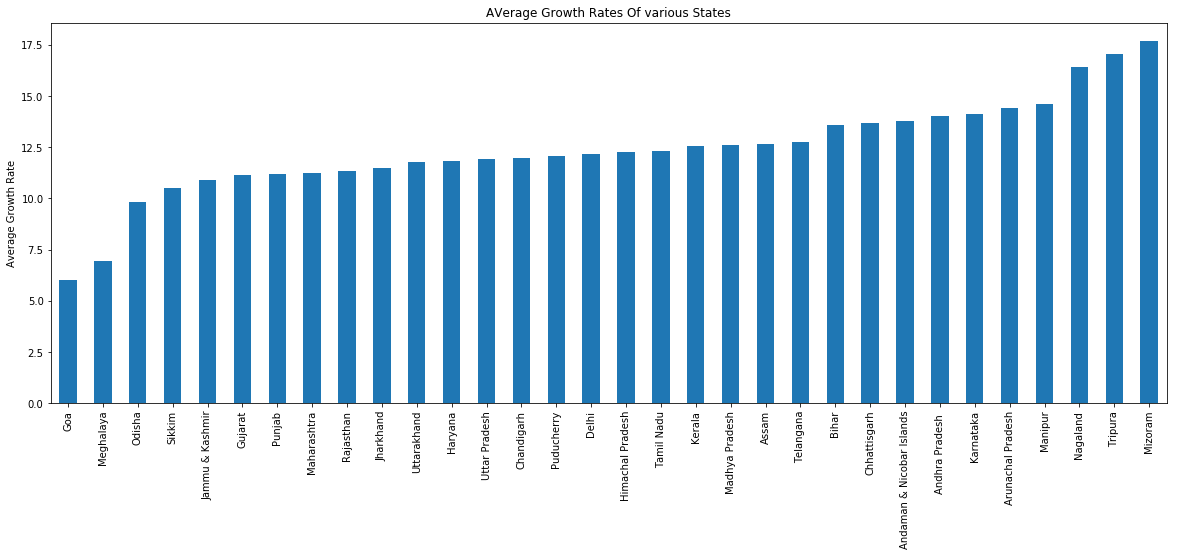

In [36]:
# plotting the avergae growth of various sates. 
plt.figure(figsize=(20,7))
#df.loc[[7,8,9]].mean(axis=0).sort_values().plot.bar()
Mean_value_each_state.sort_values().plot.bar()
plt.ylabel('Average Growth Rate')
plt.title('AVerage Growth Rates Of various States')
plt.show()

1) Which states have been growing consistently fast, and which ones have been struggling ?
> From the above plot we can say Mizoram, Tripura has been growing consistently fast.Goa , Meghalaya have been struggling 


2) Curiosity exercise - what has been the average growth rate of your home state, and how does it compare to the national average over this duration?
> The average growth rate of my home state (Telangana) was 12.76 which is 13% above the national average (11.20).





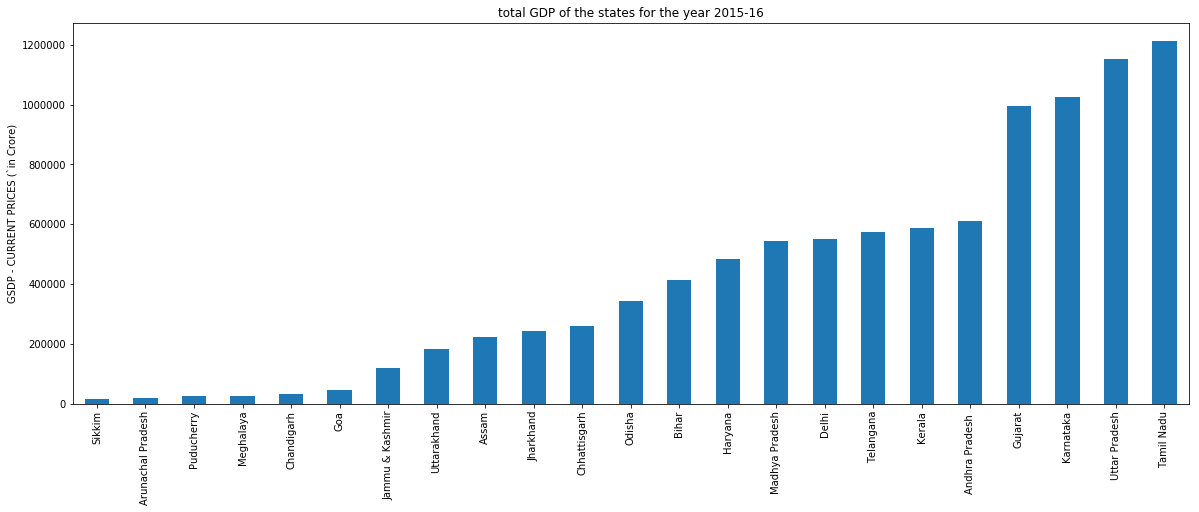

In [37]:
#plotting GDP of the states for the year 2015-16
plt.figure(figsize=(20,7))
GDP_STATES_=df.loc[[4]].mean(axis=0).drop(['West Bengal1','All_India GDP']).dropna().sort_values().plot.bar() #GDP of the states for the year 2015-16
plt.ylabel('GSDP - CURRENT PRICES (`in Crore)')
plt.title('total GDP of the states for the year 2015-16')
plt.show()


Q) Identify the top-5 and the bottom-5 states based on total GDP
> Top-5 states - Tamilnadu, Uttarpradesh, Karnataka, Gujarat, Andhrapradesh. 
>> Bottom 5 states - Sikkim, Arunachal Pradesh, Puducherry, Meghalaya, Chandigarh

### PART I-B

In [38]:
# importing modules and reading PartI-B all CSV files
import os
import glob
csvfiles = glob.glob(r"C:\Users\vamshipeddapalli\Desktop\Data_science_IIIT\Main_course\Modules\Statistics_EDA\GDP-Analysis-assignments\Data_1-B/*.csv")
union_terr = ['Delhi', 'Chandigarh', 'Andaman_&_Nicobar_Islands','Puducherry']
all_files= [i for i in csvfiles if i.split('-')[4] not in union_terr]
#all_files = csvfiles
#print(all_files)

In [39]:
# combining all files into one data frame, as we have encoding issue converting the encoding
df_all_states=pd.concat([pd.read_csv(f, encoding = 'ISO8859', usecols=['S.No.','Item','2014-15']).assign(state=f.split('-')[4])
                        for f in all_files])
#print(df_all_states)

In [40]:
# sorting vales and adding it to a new data frame
df_all_states_new = df_all_states.sort_values(by = '2014-15')#.set_index('state')
#print(df_all_states_new)

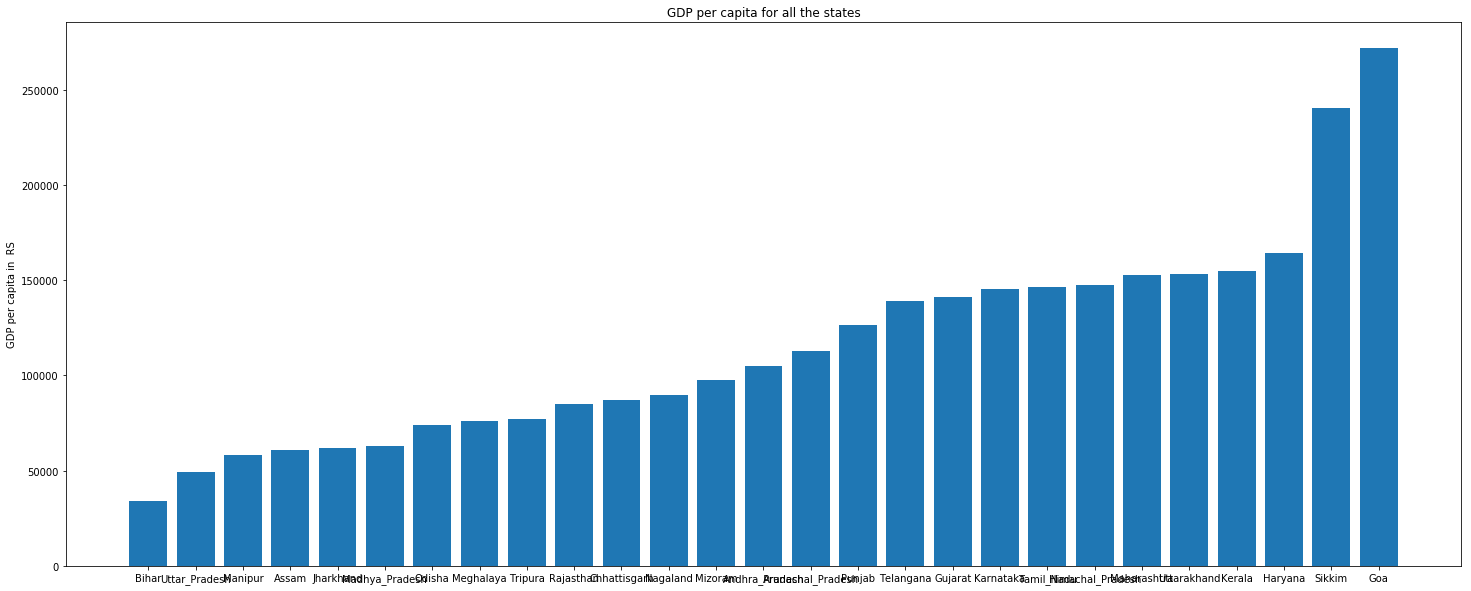

In [41]:
#Plotting the GDP per capita for all the states.
plt.figure(figsize=(25,10))
GDP_per_capita=df_all_states_new.loc[(df_all_states_new.Item == "Per Capita GSDP (Rs.)")].sort_values(by = '2014-15')
GDP_per_capita_df =pd.DataFrame(GDP_per_capita)
#print(GDP_per_capita_df.head())
plt.bar(GDP_per_capita_df['state'], GDP_per_capita_df['2014-15'])
plt.ylabel('GDP per capita in  RS')
plt.title('GDP per capita for all the states')
plt.show()

Q) Identify the top-5 and the bottom-5 states based on GDP per capita?
> Top 5 states - Goa, Sikkim, Haryana, Kerala, Uttarakhand
>> Bottom 5 states - Bihar, Uttarpradesh, Manipur, Assam, Jharkand


> Highest per capita is for Goa and Lowest per capita is Bihar. The ratio is calculated below 

In [42]:
#ratio between highest per capita and lowest per capita
df_goa= df_all_states.loc[(df_all_states.Item == "Per Capita GSDP (Rs.)") & (df_all_states.state =="Goa")]
df_Bihar= df_all_states.loc[(df_all_states.Item == "Per Capita GSDP (Rs.)") & (df_all_states.state =="Bihar")]
#print(df_goa)
#print(df_Bihar)
ratio=df_goa.iloc[:,2]/df_Bihar.iloc[:,2]
#ratio = df_goa.iloc[:,2]/ df_Bihar.iloc[:,2]
print(ratio)

32    8.004742
Name: 2014-15, dtype: float64


In [43]:
#Plot the percentage contribution of primary, secondary and tertiary sectors as a percentage of total GDP for all the states.
#gsdp for all states
GSDP_allstates=df_all_states_new.loc[(df_all_states_new.Item == "Gross State Domestic Product")].rename(columns={'2014-15':'GSDP'})
#print(GSDP_allstates)

In [44]:
# Primary sector for all states 
All_sector_allstates=df_all_states_new.loc[(df_all_states_new.Item == "Primary")].rename(columns={'2014-15':'Primary'})
#print(All_sector_allstates)
# concatinating primary with secondary 
All_sector_allstates=pd.merge(All_sector_allstates, df_all_states_new.loc[(df_all_states_new.Item == "Secondary")], how='inner', on='state').rename(columns={'2014-15':'Secondary'})
#print(All_sector_allstates)
#concatenating primary. secondary with Teritary
All_sector_allstates=pd.merge(All_sector_allstates, df_all_states_new.loc[(df_all_states_new.Item == "Tertiary")], how='inner', on='state').rename(columns={'2014-15':'Tertiary'})
All_sector_allstates.head()
#All_sector_allstates= All_sector_allstates.loc[['State','Primary','Secondary','Tertiary']]

,S.No._x,Item_x,Primary,state,S.No._y,Item_y,Secondary,S.No.,Item,Tertiary
0,Total,Primary,138776.0,Sikkim,Total,Secondary,845253.0,Total,Tertiary,483103.0
1,Total,Primary,225598.0,Mizoram,Total,Secondary,270072.0,Total,Tertiary,637619.0
2,Total,Primary,312129.0,Goa,Total,Secondary,1547536.0,Total,Tertiary,1738217.0
3,Total,Primary,383140.0,Manipur,Total,Secondary,220173.0,Total,Tertiary,1177334.0
4,Total,Primary,451050.0,Meghalaya,Total,Secondary,637942.0,Total,Tertiary,1200655.0


In [45]:
# Filtering out State , GSDP from main data GSDP df
GSDP_allstates_new=GSDP_allstates.filter(['state', 'GSDP'],axis=1)
#Filtering out State , GSDP from main data GSDP df
All_sector_allstates_new=All_sector_allstates.filter(['state','Primary','Secondary','Tertiary'], axis=1)
#combining GSDP , Primary, secondary, Tertiary
GSDP_PRI_SEC_TER= pd.merge(All_sector_allstates_new,GSDP_allstates_new, how = 'inner',on='state')
#print(GSDP_PRI_SEC_TER)

In [46]:
#calculatring percentage contribution of primary, secondary and tertiary sectors as a percentage of total GDP
GSDP_PRI_SEC_TER['Primary_%'] = (GSDP_PRI_SEC_TER ['Primary'] / GSDP_PRI_SEC_TER ['GSDP'])*100
GSDP_PRI_SEC_TER['Secondary_%']  = (GSDP_PRI_SEC_TER ['Secondary'] / GSDP_PRI_SEC_TER ['GSDP'])*100
GSDP_PRI_SEC_TER['Tertiary_%'] = (GSDP_PRI_SEC_TER ['Tertiary'] / GSDP_PRI_SEC_TER ['GSDP'])*100
GSDP_PRI_SEC_TER['Total_pri_sec_tri_%'] = (GSDP_PRI_SEC_TER['Primary_%'] + GSDP_PRI_SEC_TER['Secondary_%'] +GSDP_PRI_SEC_TER['Tertiary_%'])
#print (GSDP_PRI_SEC_TER['Total_pri_sec_tri_%'])

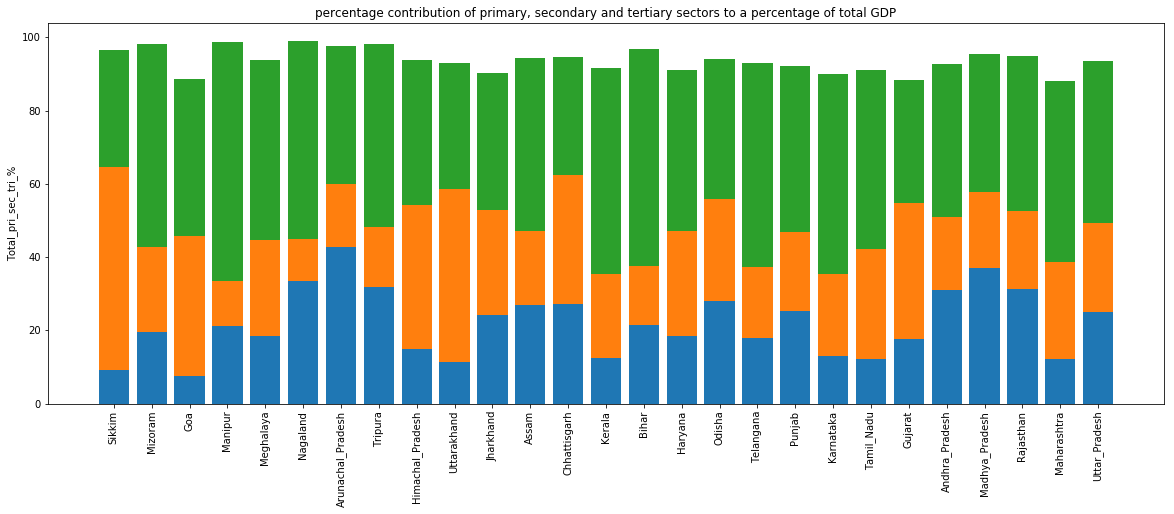

In [47]:
#plotting the percentage contribution of primary, secondary and tertiary sectors to a percentage of total GDP
plt.figure(figsize=(20,7))
plt.ylabel('Total_pri_sec_tri_%')
plt.title('percentage contribution of primary, secondary and tertiary sectors to a percentage of total GDP')
primary = GSDP_PRI_SEC_TER['Primary_%']
secondary = GSDP_PRI_SEC_TER['Secondary_%']
Tertiary = GSDP_PRI_SEC_TER['Tertiary_%']
#print(GSDP_PRI_SEC_TER['state'].head())
states = GSDP_PRI_SEC_TER['state']
p1= plt.bar(states,primary)
p2 = plt.bar(states, secondary, bottom=primary)
p3 = plt.bar(states, Tertiary, bottom=np.array(primary)+np.array(secondary))
plt.xticks(states,rotation=90)
plt.show()


In [48]:
#Categoriging the states into four categories based on GDP per capita (C1, C2, C3, C4 - C1 would have the highest per capita GDP, C4 the lowest)
GDP_per_capita_df.head()
GDP_per_capita_df_sorted = GDP_per_capita_df.loc[GDP_per_capita_df['Item'] == 'Per Capita GSDP (Rs.)'].sort_values(by='2014-15')[['2014-15','state']].rename(columns = {'2014-15':'per_capita_GSDP'})

#GDP_per_capita_df_sorted
#states_per_capita_sorted.head()
total_states = GDP_per_capita_df_sorted['state'].count()
total_states
print(int(round(total_states*1)))

#quantile values are (0.20,0.5, 0.85, 1), i.e. the states lying between the 85th and the 100th percentile are in C1, 
#those between 20th and 50-th percentile are in 3, those below 20 percentile are in C4
c4 = GDP_per_capita_df_sorted.iloc[:int(round(total_states*.20)),:]
c3 = GDP_per_capita_df_sorted.iloc[int(round(total_states*.20)):int(round(total_states*.5)),:]
c2 = GDP_per_capita_df_sorted.iloc[int(round(total_states*.5)):int(round(total_states*.85)),:]
c1 = GDP_per_capita_df_sorted.iloc[int(round(total_states*.85)):total_states,:]

#print(c1)
#print(c2)
#print(c3)
#print(c4)

27


In [49]:
#C1 category percentage of GSDP contribution
c1_df = df_all_states.loc[df_all_states.state.isin(c1.state)&(df_all_states['S.No.']!='Total')&
        (~df_all_states['Item'].isin(['TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products',"Population ('00)",'Per Capita GSDP (Rs.)']))]
c1_df = c1_df[['Item','2014-15']].groupby(by='Item').sum().sort_values(by='2014-15',ascending=False).reset_index()

c1_df['%_of_GSDP_Contribution'] = c1_df['2014-15']/(c1_df['2014-15'][0])*100
start =1; End = 4
while c1_df.iloc[start:End ,-1].sum() <= 78:
    End = End+1
C1_Sub_Sec_80_percent_con_apprx = c1_df[['Item','%_of_GSDP_Contribution']].iloc[start:End].append({'Item':'ABOVE C1 SUB-SECTORS EXACT CONTRIBUTION =','%_of_GSDP_Contribution':round(c1_df.iloc[start:End ,-1].sum(),2)},ignore_index=True).rename(columns={'Item':'C1_Sub_Sect_contributes_80%_approx_GSDP_in_Total'})
C1_Sub_Sec_80_percent_con_apprx

,C1_Sub_Sect_contributes_80%_approx_GSDP_in_Total,%_of_GSDP_Contribution
0,"Real estate, ownership of dwelling & professio...",14.461049
1,"Agriculture, forestry and fishing",14.119213
2,"Trade, repair, hotels and restaurants",13.730076
3,Manufacturing,13.498187
4,Construction,11.051090
5,Other services,7.907258
6,Crops,7.811695
7,ABOVE C1 SUB-SECTORS EXACT CONTRIBUTION =,82.580000


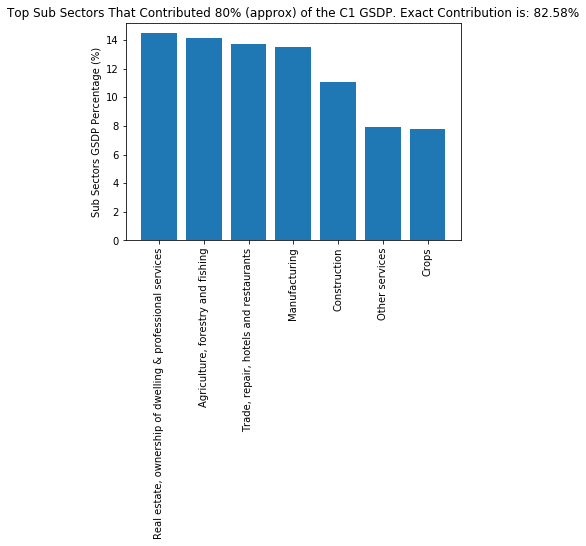

In [50]:
#The contribution of the sub-sectors as a percentage of the GSDP of C1 category

plt.bar(C1_Sub_Sec_80_percent_con_apprx['C1_Sub_Sect_contributes_80%_approx_GSDP_in_Total'].iloc[:-1], C1_Sub_Sec_80_percent_con_apprx['%_of_GSDP_Contribution'].iloc[:-1,])
plt.ylabel('Sub Sectors GSDP Percentage (%)')
title='Top Sub Sectors That Contributed 80% (approx) of the C1 GSDP. Exact Contribution is: {0}%'.format(C1_Sub_Sec_80_percent_con_apprx.iloc[-1:,-1:].values[0][0])
plt.title(title)
plt.xticks(C1_Sub_Sec_80_percent_con_apprx['C1_Sub_Sect_contributes_80%_approx_GSDP_in_Total'].iloc[:-1,],rotation=90)
plt.show()

#print(C1_Sub_Sec_80_percent_con_apprx['%_of_GSDP_Contribution'])

In [51]:
#C2 category percentage of GSDP contribution
c2_df = df_all_states.loc[df_all_states.state.isin(c2.state)&(df_all_states['S.No.']!='Total')&
        (~df_all_states['Item'].isin(['TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products',"Population ('00)",'Per Capita GSDP (Rs.)']))]
c2_df = c2_df[['Item','2014-15']].groupby(by='Item').sum().sort_values(by='2014-15',ascending=False).reset_index()

c2_df['%_of_GSDP_Contribution'] = c2_df['2014-15']/(c2_df['2014-15'][0])*100
start =1; End = 4
while c2_df.iloc[start:End ,-1].sum() <= 78:
    End = End+1
C2_Sub_Sec_80_percent_con_apprx = c2_df[['Item','%_of_GSDP_Contribution']].iloc[start:End].append({'Item':'ABOVE C2 SUB-SECTORS EXACT CONTRIBUTION =','%_of_GSDP_Contribution':round(c2_df.iloc[start:End ,-1].sum(),2)},ignore_index=True).rename(columns={'Item':'C2_Sub_Sect_contributes_80%_approx_GSDP_in_Total'})
C2_Sub_Sec_80_percent_con_apprx

,C2_Sub_Sect_contributes_80%_approx_GSDP_in_Total,%_of_GSDP_Contribution
0,Manufacturing,18.622130
1,"Real estate, ownership of dwelling & professio...",15.710184
2,"Agriculture, forestry and fishing",12.825977
3,"Trade, repair, hotels and restaurants",10.443537
4,Trade & repair services,9.422608
5,Crops,8.109086
6,Construction,6.932967
7,ABOVE C2 SUB-SECTORS EXACT CONTRIBUTION =,82.070000


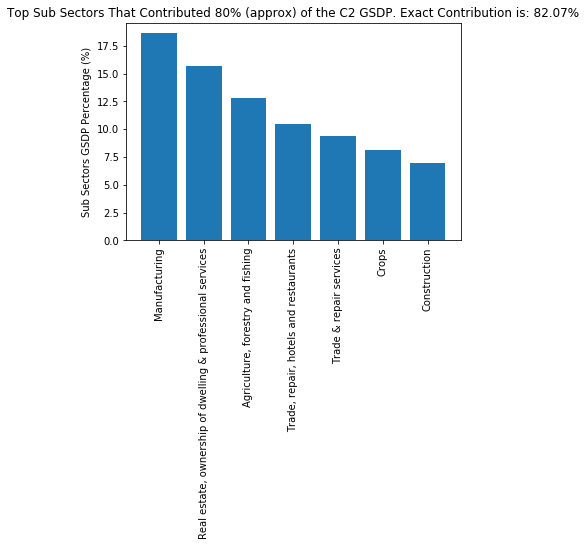

In [52]:
#The contribution of the sub-sectors as a percentage of the GSDP of C2 category

plt.bar(C2_Sub_Sec_80_percent_con_apprx['C2_Sub_Sect_contributes_80%_approx_GSDP_in_Total'].iloc[:-1], C2_Sub_Sec_80_percent_con_apprx['%_of_GSDP_Contribution'].iloc[:-1,])
plt.ylabel('Sub Sectors GSDP Percentage (%)')
title='Top Sub Sectors That Contributed 80% (approx) of the C2 GSDP. Exact Contribution is: {0}%'.format(C2_Sub_Sec_80_percent_con_apprx.iloc[-1:,-1:].values[0][0])
plt.title(title)
plt.xticks(C2_Sub_Sec_80_percent_con_apprx['C2_Sub_Sect_contributes_80%_approx_GSDP_in_Total'].iloc[:-1,],rotation=90)
plt.show()


In [53]:
#C3 category percentage of GSDP contribution
c3_df = df_all_states.loc[df_all_states.state.isin(c3.state)&(df_all_states['S.No.']!='Total')&
        (~df_all_states['Item'].isin(['TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products',"Population ('00)",'Per Capita GSDP (Rs.)']))]
c3_df = c3_df[['Item','2014-15']].groupby(by='Item').sum().sort_values(by='2014-15',ascending=False).reset_index()

c3_df['%_of_GSDP_Contribution'] = c3_df['2014-15']/(c3_df['2014-15'][0])*100
start =1; End = 4
while c3_df.iloc[start:End ,-1].sum() <= 78:
    End = End+1
C3_Sub_Sec_80_percent_con_apprx = c3_df[['Item','%_of_GSDP_Contribution']].iloc[start:End].append({'Item':'ABOVE C3 SUB-SECTORS EXACT CONTRIBUTION =','%_of_GSDP_Contribution':round(c3_df.iloc[start:End ,-1].sum(),2)},ignore_index=True).rename(columns={'Item':'C3_Sub_Sect_contributes_80%_approx_GSDP_in_Total'})
C3_Sub_Sec_80_percent_con_apprx

,C3_Sub_Sect_contributes_80%_approx_GSDP_in_Total,%_of_GSDP_Contribution
0,"Agriculture, forestry and fishing",25.849557
1,Crops,16.312163
2,Manufacturing,11.676084
3,"Trade, repair, hotels and restaurants",9.993973
4,Trade & repair services,9.288358
5,Construction,8.892230
6,ABOVE C3 SUB-SECTORS EXACT CONTRIBUTION =,82.010000


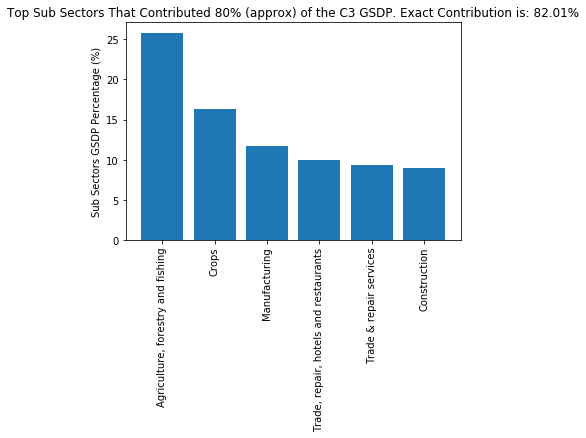

In [54]:
#The contribution of the sub-sectors as a percentage of the GSDP of C3 category

plt.bar(C3_Sub_Sec_80_percent_con_apprx['C3_Sub_Sect_contributes_80%_approx_GSDP_in_Total'].iloc[:-1], C3_Sub_Sec_80_percent_con_apprx['%_of_GSDP_Contribution'].iloc[:-1,])
plt.ylabel('Sub Sectors GSDP Percentage (%)')
title='Top Sub Sectors That Contributed 80% (approx) of the C3 GSDP. Exact Contribution is: {0}%'.format(C3_Sub_Sec_80_percent_con_apprx.iloc[-1:,-1:].values[0][0])
plt.title(title)
plt.xticks(C3_Sub_Sec_80_percent_con_apprx['C3_Sub_Sect_contributes_80%_approx_GSDP_in_Total'].iloc[:-1,],rotation=90)
plt.show()

In [55]:
#C4 category percentage of GSDP contribution
c4_df = df_all_states.loc[df_all_states.state.isin(c4.state)&(df_all_states['S.No.']!='Total')&
        (~df_all_states['Item'].isin(['TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products',"Population ('00)",'Per Capita GSDP (Rs.)']))]
c4_df = c4_df[['Item','2014-15']].groupby(by='Item').sum().sort_values(by='2014-15',ascending=False).reset_index()

c4_df['%_of_GSDP_Contribution'] = c4_df['2014-15']/(c4_df['2014-15'][0])*100
start =1; End = 4
while c4_df.iloc[start:End ,-1].sum() <= 78:
    End = End+1
C4_Sub_Sec_80_percent_con_apprx = c4_df[['Item','%_of_GSDP_Contribution']].iloc[start:End].append({'Item':'ABOVE C4 SUB-SECTORS EXACT CONTRIBUTION =','%_of_GSDP_Contribution':round(c4_df.iloc[start:End ,-1].sum(),2)},ignore_index=True).rename(columns={'Item':'C4_Sub_Sect_contributes_80%_approx_GSDP_in_Total'})
C4_Sub_Sec_80_percent_con_apprx

,C4_Sub_Sect_contributes_80%_approx_GSDP_in_Total,%_of_GSDP_Contribution
0,"Agriculture, forestry and fishing",21.885190
1,Crops,14.112128
2,"Trade, repair, hotels and restaurants",11.957100
3,"Real estate, ownership of dwelling & professio...",11.627645
4,Manufacturing,11.141726
5,Trade & repair services,11.092776
6,ABOVE C4 SUB-SECTORS EXACT CONTRIBUTION =,81.820000


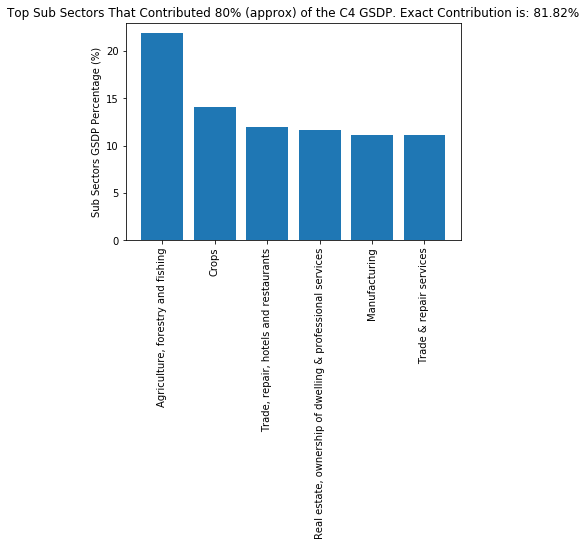

In [56]:
#The contribution of the sub-sectors as a percentage of the GSDP of C4 category
plt.bar(C4_Sub_Sec_80_percent_con_apprx['C4_Sub_Sect_contributes_80%_approx_GSDP_in_Total'].iloc[:-1], C4_Sub_Sec_80_percent_con_apprx['%_of_GSDP_Contribution'].iloc[:-1,])
plt.ylabel('Sub Sectors GSDP Percentage (%)')
title='Top Sub Sectors That Contributed 80% (approx) of the C4 GSDP. Exact Contribution is: {0}%'.format(C4_Sub_Sec_80_percent_con_apprx.iloc[-1:,-1:].values[0][0])
plt.title(title)
plt.xticks(C4_Sub_Sec_80_percent_con_apprx['C4_Sub_Sect_contributes_80%_approx_GSDP_in_Total'].iloc[:-1,],rotation=90)
plt.show()

In [57]:
#Average, Maximum, Minimum of C1,C2,C3, C4
#C1
print("Average of C1 ", round(c1['per_capita_GSDP'].mean()))
print("Maximum of C1 ", round(c1['per_capita_GSDP'].max()))
print("Minimum of C1 ", round(c1['per_capita_GSDP'].min()))
#C2
print("Average of C2 ", round(c2['per_capita_GSDP'].mean()))
print("Maximum of C2 ", round(c2['per_capita_GSDP'].max()))
print("Minimum of C2 ", round(c2['per_capita_GSDP'].min()))
#C3
print("Average of C3 ", round(c3['per_capita_GSDP'].mean()))
print("Maximum of C3 ", round(c3['per_capita_GSDP'].max()))
print("Minimum of C3 ", round(c3['per_capita_GSDP'].min()))
#C4
print("Average of C4 ", round(c4['per_capita_GSDP'].mean()))
print("Maximum of C4 ", round(c4['per_capita_GSDP'].max()))
print("Minimum of C4 ", round(c4['per_capita_GSDP'].min()))


Average of C1  207730
Maximum of C1  271793.0
Minimum of C1  154778.0
Average of C2  140503
Maximum of C2  153076.0
Minimum of C2  112718.0
Average of C3  83836
Maximum of C3  104977.0
Minimum of C3  62989.0
Average of C4  52912
Maximum of C4  62091.0
Minimum of C4  33954.0


 How does the GDP distribution of the top states (C1) differ from the others ?
 >Here C1 has the highest GDP distribution when compared with C2, C3, C4. C4 has the lowest GDP distribution. 

In [58]:
#Which sub-sectors seem to be correlated with high GDP? ? 
# calculating the subsectors which are more related to GDP
df_all_states[['Item', '2014-15']].groupby('Item').sum().sort_values(by='2014-15')

,2014-15
Item,
Road transport*,3.071470e+05
Water transport,5.158590e+05
Storage,6.839540e+05
Air transport,1.006353e+06
Road transport**,2.761427e+06
Per Capita GSDP (Rs.),3.114527e+06
Services incidental to transport,3.242013e+06
Services incidental to transport*,3.697291e+06
Trade & repair services*,7.763847e+06


Q) Which sub-sectors seem to be correlated with high GDP? ? 
>From the above analysis we can clearly say that Agriculture, forestry and fishing sector is more corelated to GDP followed by Manufacturing, Real estate, ownership of dwelling & professional services.	

Q) Which sub-sectors do the various categories need to focus on? 
>From the above analysis we can clearly say that Road transport,Watertransport and Storage are the three main categories that we need to focus on.



Q)which you think are important and write your insights for category separately ?
> if we look at the percentage contribution of primary, secondary and tertiary sectors to a percentage of total GDP, primary sector is contributing less when compared to secondary and Teritary. There is a lot scope to increase percentage contrribution in primary sector. 

Q) Finally, provide at least two recommendations for each category to improve the per capita GDP.
> The government needs to focus on Road Transport, water transport categories where there is a scope to achieve high GDP. By taking necessary actions we can improve transport sector.Fort example we can take up the recent issue "AIR INDIA", there is a lot scope to develop the avaiation sector in our country. 
>> Beside having this traditional investments government should open up a policy to attract foreign investments into private sector. Government can provide some incentives to the companies if they start up their product at the low GDP states, this way economically the low income states can improve their standard.

## Part-II: GDP and Education Drop-out Rates

In [59]:
#Analyse if there is any correlation of GDP per capita with dropout rates in education (primary, upper primary 
#and secondary) for the year 2014-2015 for the states.Choose an appropriate plot to conduct this analysis.
df_edu=pd.read_csv(r"C:\Users\vamshipeddapalli\Desktop\Data_science_IIIT\Main_course\Modules\Statistics_EDA\GDP-Analysis-assignments\Part-2\rs_session243_au570_1.1.csv")
#df_edu

In [60]:
# renaming the column names as we have similar column names in the actual dataset, renaming Level of Education - State to state (as we need to merge the file with main GDP _Per_capita file based on state) 
df_edu_new=df_edu.rename(columns={'Primary - 2014-2015':'Primary - 2013-2014', 'Primary - 2014-2015.1':'Primary - 2014-2015','Level of Education - State':'state'})

In [61]:
#here in the question we need to correlate of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for the states
# filtering out the required data from main dataframe, dropping NAN values and correccting the state names
df_edu_new= df_edu_new[['state','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']].replace(['Chhatisgarh','Uttrakhand'],['Chhattisgarh','Uttarakhand']).dropna(how='any')
#df_edu_new


In [62]:
# merging dataframes to get GDP and df_edu_new 
df_gdp_edu = pd.merge(GDP_per_capita_df[GDP_per_capita_df.Item=='Per Capita GSDP (Rs.)'], df_edu_new, how = 'inner', on = 'state')


Text(0, 0.5, 'secondary 2014-15 drop out percentage')

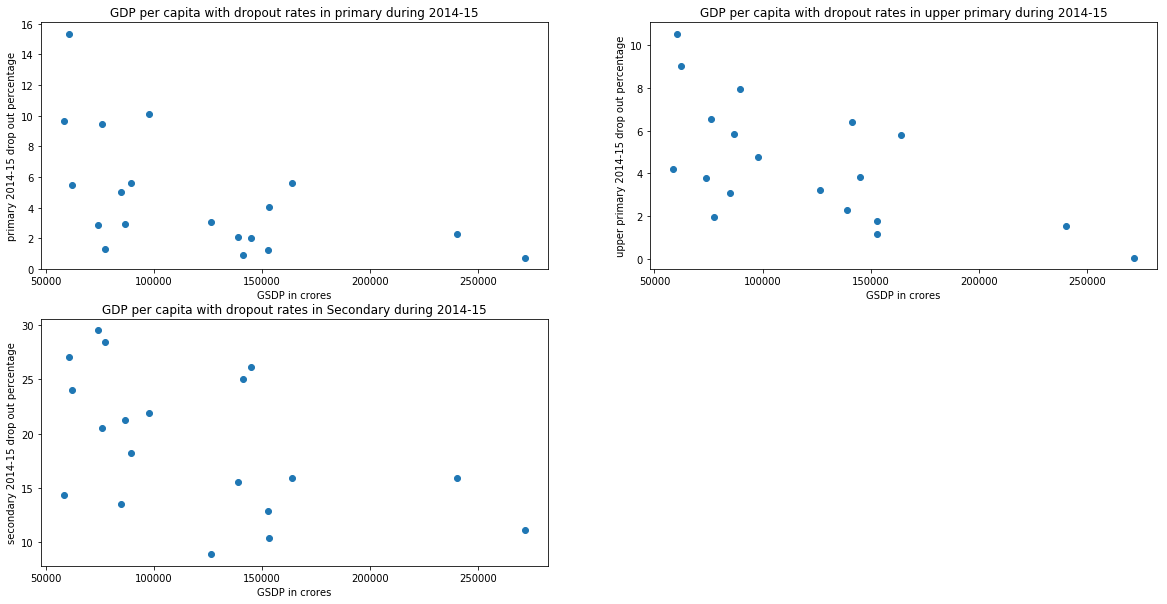

In [63]:
#plot of GDP per capita with dropout rates in education (primary, upper primary and secondary)
plt.figure(figsize=(20,10))

#GDP percapita vs primary
plt.subplot(221)
plt.scatter(df_gdp_edu['2014-15'].values,df_gdp_edu['Primary - 2014-2015'].values)
plt.title('GDP per capita with dropout rates in primary during 2014-15')
plt.xlabel('GSDP in crores')
plt.ylabel('primary 2014-15 drop out percentage')

#GDP percapita vs upper primary
plt.subplot(222)
plt.scatter(df_gdp_edu['2014-15'].values,df_gdp_edu['Upper Primary - 2014-2015'].values)
plt.title('GDP per capita with dropout rates in upper primary during 2014-15')
plt.xlabel('GSDP in crores')
plt.ylabel('upper primary 2014-15 drop out percentage')


#GDP percapita vs secondary
plt.subplot(223)
plt.scatter(df_gdp_edu['2014-15'].values,df_gdp_edu['Secondary - 2014-2015'].values)
plt.title('GDP per capita with dropout rates in Secondary during 2014-15')
plt.xlabel('GSDP in crores')
plt.ylabel('secondary 2014-15 drop out percentage')

From the above scatter plots I can observer when there is low GDP the drop out rates are more, at the median GDP (example at 150000 cr GSDP) the drop out rates are comparatiovely less compared to drop out rates of low GDP. When the GDP is increasing the drop out rates are falling down. 

Q) Hypothesis for the observations from the data
> From the above three plots I can clearly say the drop out percentage is more in secondary when compared to primary and upper primary. But from the same secondary drop out rates plot I can clearlyt say when the GSDP ius increasing the drop out rates are falling down. 
>> Either the respective states or government can certain initiatives to increase GSDP which leads to reduce drop out rates in  primary, secondary and upper primary education system(specially secondary). 